# **Compte rendu TP2: Segmentation**

### <font color=blue>Sahar letaief / 3DNI1 <font/>

## L’algorithme k-means:
Est l’algorithme de clustering le plus connu et le plus utilisé, du fait de sa simplicité de mise en œuvre.<br> 
L’algorithme itératif renvoie une partition des données dont le résultat est un ensemble de clusters compacts et clairement séparés.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans,MiniBatchKMeans
import skimage.io
from skimage.restoration import denoise_tv_chambolle
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def segm(k):
#Charger l'image
    image = cv2.imread('sunflower.jpg')
    (h1, w1) = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)
    plt.figure(figsize=(10,11))

    cv2.imwrite('sf3.jpg', quant)
    img1 = cv2.imread('sf3.jpg')
    return plt.imshow(img1)
plt.show()
interact(segm,k=widgets.IntSlider(min=2, max=15, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=15, min=2), Output()), _dom_classes=('widget-int…

##### Une image 
Est une collection ou un ensemble de pixels différents dont la segmentation d'image est une opération de traitement d'images qui a pour but de rassembler des pixels entre eux suivant des critères pré-définis. 

## Les widgets:
* Des objets Python riches en événements qui ont une représentation dans le navigateur, souvent sous forme de contrôle comme un curseur, une zone de texte,etc.
* Ils permettent de créer des interfaces graphiques interactives pour notebook.

In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


##### * Plus on augmente le nombre des clusters plus l'image se ressemble à l'original et les détails deviennent plus clairs.

In [3]:
!pip install opencv-python

In [8]:
%load_ext watermark

In [11]:
%watermark -v -m -p pandas,numpy,cv2,sklearn.cluster,skimage,matplotlib

CPython 3.8.3
IPython 7.16.1

pandas 1.0.5
numpy 1.18.5
cv2 4.4.0
sklearn.cluster 0.23.1
skimage 0.16.2
matplotlib 3.2.2

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
CPU cores  : 4
interpreter: 64bit


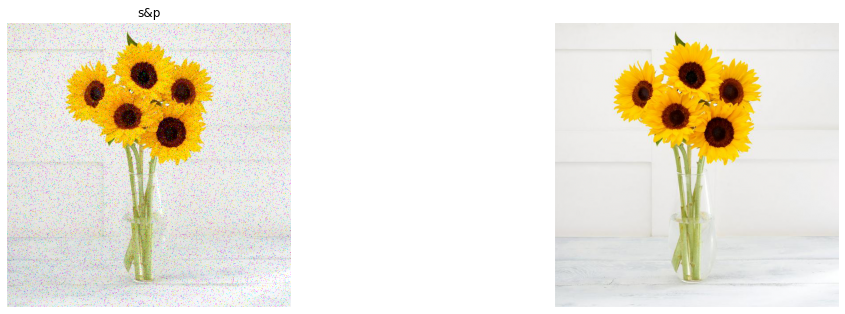

In [10]:
import skimage.io
import matplotlib.pyplot as plt
img_path="sunflower.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
plotnoise(img, "s&p", r,c,1)
plotnoise(img, None, r,c,2)
plt.show()

##### salt and pepper noise:
Un outil utile pour augmenter les images pour former des modèles d'apprentissage en profondeur,consiste à ajouter des pixels blancs et noirs au hasard dans la matrice d'image.

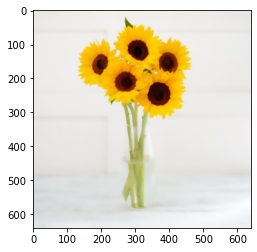

In [11]:
new_image=denoise_tv_chambolle(img,weight=0.1,multichannel=True)
plt.imshow(new_image)

#### => Le clustering (segmentation) est une étape de base du traitement d’une image. <br> Cette opération a pour but de séparer différentes zones homogènes d’une image, afin d’organiser les objets en groupes (clusters) dont les membres ont en commun diverses propriétés (intensité, couleur, texture, etc). 
#### Les images prétraitées peuvent permettre à un modèle de base d'atteindre une précision élevée par rapport à un modèle plus complexe formé sur des images qui n'ont pas été prétraitées.